In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Preprocessing the Data

In [32]:
df = pd.read_csv('input.csv')
print(df)

       Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z                               9.9   
1              M6

In [33]:
df = df.sample(frac=1)
split = int (0.8*len(df))

train_X = df[:split]['Fuel Consumption Comb (mpg)']
train_Y = df[:split]['CO2 Emissions(g/km)']

test_X = df[split:]['Fuel Consumption Comb (mpg)']
test_Y = df[split:]['CO2 Emissions(g/km)']

print(train_X.shape)
print(train_Y.shape)

print(test_X.shape)
print(test_Y.shape)

(5908,)
(5908,)
(1477,)
(1477,)


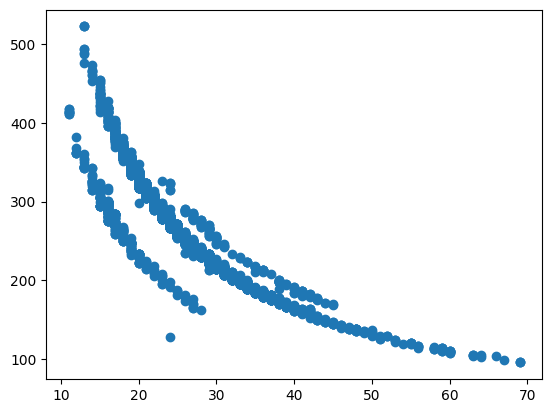

In [34]:
plt.scatter(train_X, train_Y)

Training the Model

In [35]:
def linear_regression(X, Y):
    n = len(X)
    
    numerator = np.sum(X * Y) - ((np.sum(Y) * np.sum(X)) / n)
    denominator = np.sum(X ** 2) - ((np.sum(X) ** 2) / n)
    
    coef = numerator / denominator
    
    intercept = (np.sum(Y) / n) - coef * (np.sum(X) / n)
    
    return intercept, coef

Evaluate the Model

In [36]:
def mae(X, Y, func):
    total = sum(abs(func(X)-Y))
    return total / len(X)

Original Data

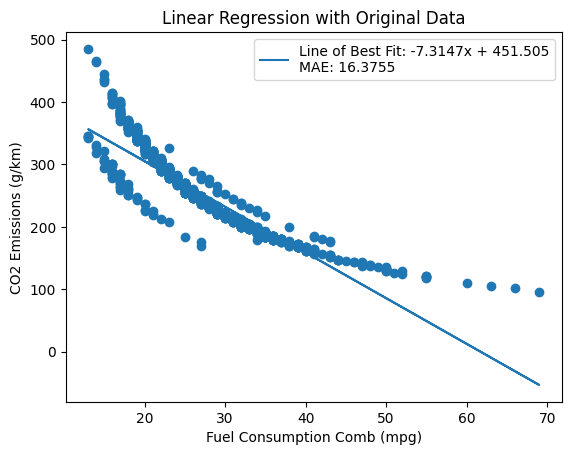

In [37]:
b_0, b_1 = linear_regression(train_X, train_Y)
f = lambda x: b_1 * x + b_0
mae_original = mae(train_X, train_Y, f)


plt.title("Linear Regression with Original Data")
plt.xlabel('Fuel Consumption Comb (mpg)')
plt.ylabel('CO2 Emissions (g/km)')

plt.plot(test_X, f(test_X), label='Line of Best Fit: ' + str(round(b_1, 4)) + 'x + ' + str(round(b_0, 4)) + '\nMAE: ' + str(round(mae_original, 4)))
plt.scatter(test_X, test_Y)

plt.legend()

Normalize Data

In [38]:
norm_train_X = (train_X - np.min(train_X)) / (np.max(train_X) - np.min(train_X))
norm_train_Y = (train_Y - np.min(train_Y)) / (np.max(train_Y) - np.min(train_Y))

norm_test_X = (test_X - np.min(test_X)) / (np.max(test_X) - np.min(test_X))
norm_test_Y = (test_Y - np.min(train_Y)) / (np.max(train_Y) - np.min(train_Y))

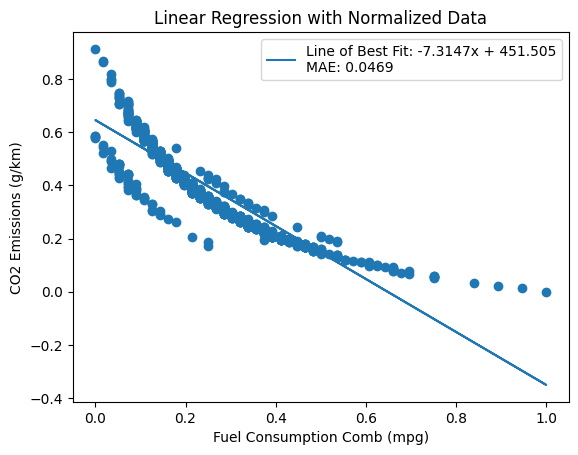

In [39]:
norm_b_0, norm_b_1 = linear_regression(norm_train_X, norm_train_Y)
f_norm = lambda x: norm_b_1 * x + norm_b_0
mae_norm = mae(norm_test_X, norm_test_Y, f_norm)

plt.title("Linear Regression with Normalized Data")
plt.xlabel('Fuel Consumption Comb (mpg)')
plt.ylabel('CO2 Emissions (g/km)')

plt.plot(norm_test_X, f_norm(norm_test_X), label='Line of Best Fit: ' + str(round(b_1, 4)) + 'x + ' + str(round(b_0, 4)) + '\nMAE: ' + str(round(mae_norm, 4)))
plt.scatter(norm_test_X, norm_test_Y)

plt.legend()

Standardize Data

In [40]:
std_train_X = (train_X - np.mean(train_X)) / (np.std(train_X))
std_train_Y = (train_Y - np.mean(train_Y)) / (np.std(train_Y))

std_test_X = (test_X - np.mean(test_X)) / (np.std(test_X))
std_test_Y = (test_Y - np.mean(test_Y)) / (np.std(test_Y))

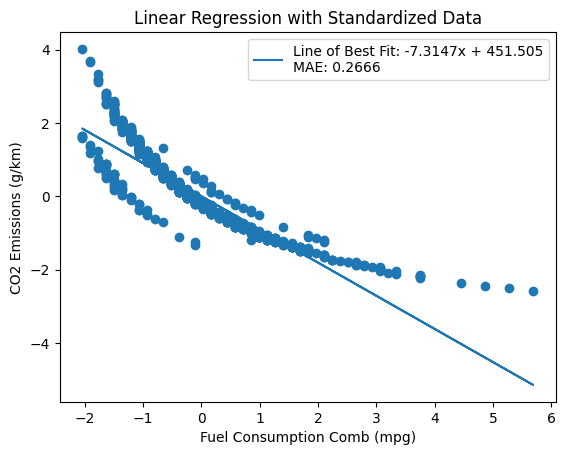

In [41]:
std_b_0, std_b_1 = linear_regression(std_train_X, std_train_Y)
f_std = lambda x: std_b_1 * x + std_b_0
mae_std = mae(std_test_X, std_test_Y, f_std)


plt.title("Linear Regression with Standardized Data")
plt.xlabel('Fuel Consumption Comb (mpg)')
plt.ylabel('CO2 Emissions (g/km)')

plt.plot(std_test_X, f_std(std_test_X), label='Line of Best Fit: ' + str(round(b_1, 4)) + 'x + ' + str(round(b_0, 4)) + '\nMAE: ' + str(round(mae_std, 4)))
plt.scatter(std_test_X, std_test_Y)

plt.legend()

Readme

In [42]:
with open("README.md", "w") as readme_file:
    readme_file.write("# CO2 Emissions Predictions using Linear Regression\n")
    
    readme_file.write(f"b_0 {b_0}\n")
    readme_file.write(f"b_1 {b_1}\n")
    readme_file.write(f"orignial mae {mae_original}\n")

    readme_file.write(f"b_0 norm {norm_b_0}\n")
    readme_file.write(f"b_1 norm {norm_b_1}\n")
    readme_file.write(f"mea norm {mae_norm}\n")
    
    readme_file.write(f"b_0 std {std_b_0}\n")
    readme_file.write(f"b_0 std {std_b_0}\n")
    readme_file.write(f"mea std {mae_std}\n")